<a href="https://colab.research.google.com/github/kuppadattasai/Encryptix/blob/main/Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('gdrive',force_remount=True)

Mounted at gdrive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("gdrive/My Drive/spam_enc.csv", encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
for col in df.columns[1:]:
    df[col] = df[col].astype(str).replace('nan', '')

In [ ]:
df['Message'] = df.iloc[:, 1:].apply(lambda x: ''.join(x.dropna()), axis=1)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Message
0,ham,"Go until jurong point, crazy.. Available only ...",,,,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,,,,Ok lar... Joking wif u oni...Ok lar... Joking ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,,,,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.drop(df.columns[1:-1], axis=1, inplace=True)
df.head()

,v1,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...Ok lar... Joking ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam_map = {"ham": 0, "spam": 1}
df['v1'] = df["v1"].map(lambda x: spam_map[x])

KeyError: 0

In [ ]:
df.head()

,v1,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...Ok lar... Joking ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={'v1': 'Spam'}, inplace=True)
df.head()

,Spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...Ok lar... Joking ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
x = df['Message']
y = df['Spam']

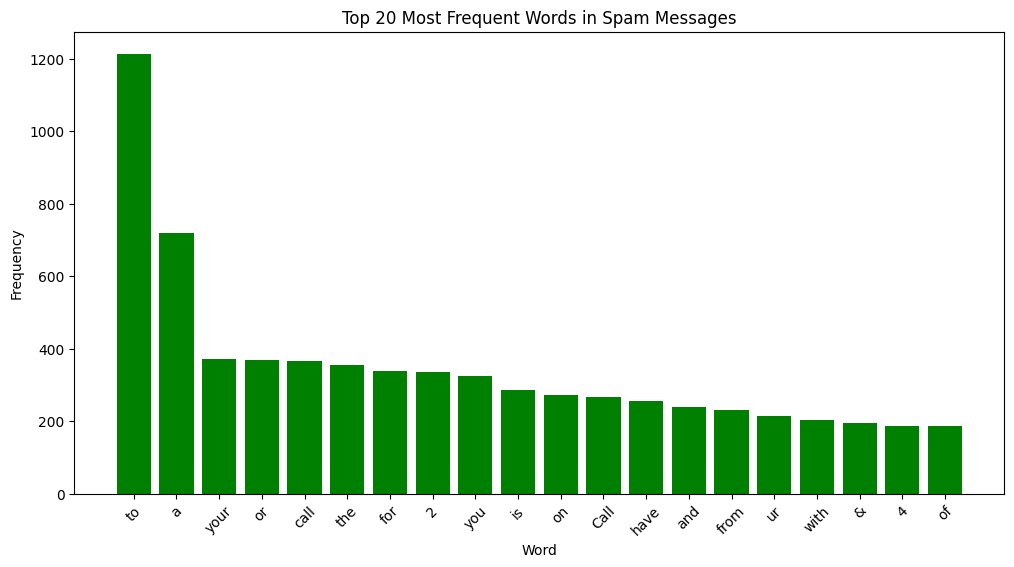

In [ ]:
# Identifying the top 20 most frequent word in spam messages

from collections import Counter

spam_words = ' '.join(df.query('Spam == 1')['Message']).split()

word_counts = Counter(spam_words)

word_counts_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
plt.bar(word_counts_df['Word'], word_counts_df['Frequency'], color='green')
plt.title('Top 20 Most Frequent Words in Spam Messages')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

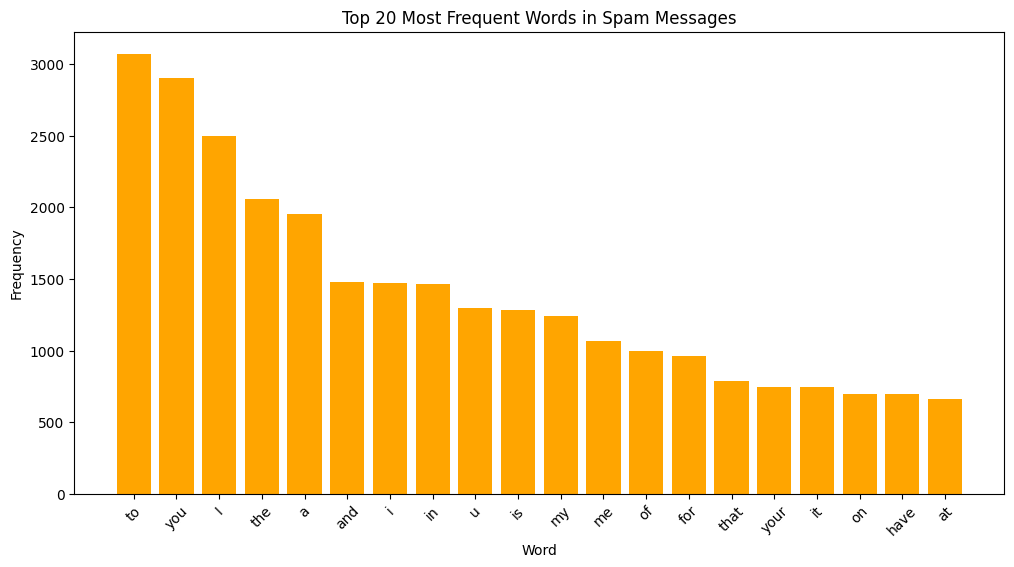

In [ ]:
# Identifying the top 20 most frequent word in spam messages

from collections import Counter

spam_words = ' '.join(df.query('Spam == 0')['Message']).split()

word_counts = Counter(spam_words)

word_counts_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
plt.bar(word_counts_df['Word'], word_counts_df['Frequency'], color='orange')
plt.title('Top 20 Most Frequent Words in Spam Messages')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english", max_features=50000)
X_train = tfidf.fit_transform(X_train.tolist())
X_test = tfidf.transform(X_test)
X_train.shape

(3900, 8183)

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [ ]:
model.score(X_test, y_test)

0.9593301435406698

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test))
cm

array([[1434,    0],
       [  68,  170]])

Text(95.72222222222221, 0.5, 'Truth')

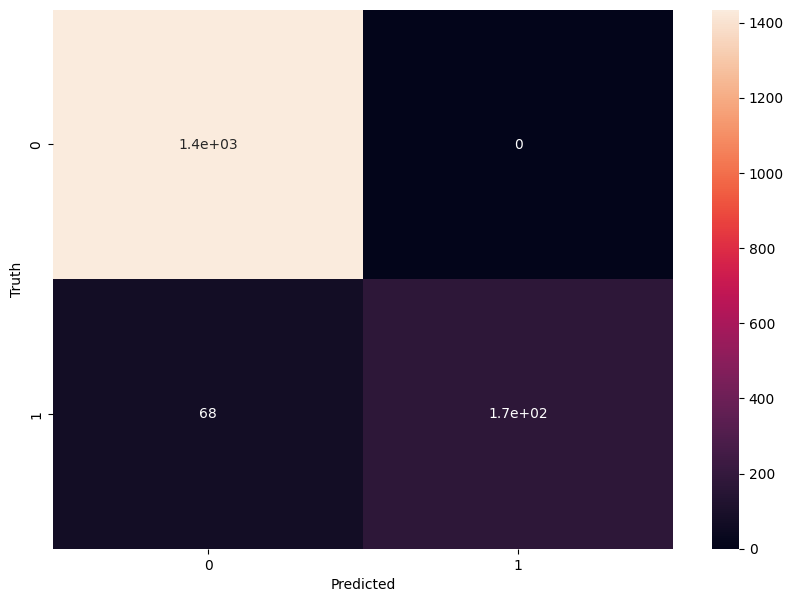

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')